In [30]:
import os
import sys
import utils
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns

pipedir = "/mnt/8tera/shareclic/fruitfly/pipe_postagged/"
ffa_results_loc = pipedir+"ffa/results/stats/"
w2v_results_file = pipedir+"w2v/results.txt"

graphics_filename    = "curve_postagged.pdf"

run_to_res = {} # [spb, spa, spd, w2v]

In [31]:
#read in fruit fly results 
for filename in os.listdir(ffa_results_loc):
    if not os.path.isdir(filename):
        with open(os.path.join(ffa_results_loc, filename)) as f:
            lines = [l.rstrip() for l in f.readlines()]
            run = int(lines[0].split()[-1][:-1]) # extracts the run number
            run_to_res[run] = [float(lines[2].split()[-1]),
                               float(lines[3].split()[-1]),
                               float(lines[4].split()[-1])] # [spb, spa, sp_diff]

In [32]:
# read in word2vec results
with open(w2v_results_file, "r") as f:
    lines = [l.rstrip() for l in f.readlines()]
    for l in lines:
        run = int(l.split()[1][:-1]) # extracts the run number
        run_to_res[run].append(float(l.split()[3])) 

In [33]:
for k in sorted(run_to_res, reverse = True):
    #print(k, round(run_to_res[k][2], 4))
    print(k, run_to_res[k])
    #print(k, v)

96 [0.10986485313045055, 0.33659861698207405, 0.2267337638516235, 0.5393897568151386]
95 [0.10987867967211232, 0.3369520699743582, 0.2270733903022459, 0.5460358070047904]
94 [0.10936841008662526, 0.3367220014069445, 0.22735359132031926, 0.5444724065223325]
93 [0.11016734567460376, 0.3348295738980287, 0.22466222822342494, 0.5528739613775536]
92 [0.11059881488638801, 0.33576179047856575, 0.22516297559217774, 0.5539645984134374]
91 [0.1100563616723278, 0.3347878896977448, 0.22473152802541702, 0.5426006154163032]
90 [0.10908244802183481, 0.33238247778792734, 0.22330002976609253, 0.5426586039815182]
89 [0.10887760564282317, 0.3321973507270659, 0.22331974508424274, 0.546764858820906]
88 [0.1087552988337677, 0.33161103132097974, 0.22285573248721205, 0.5519880725535816]
87 [0.10669720492104176, 0.32969513119927546, 0.2229979262782337, 0.5478621838170304]
86 [0.1056168116975448, 0.32855647957737544, 0.22293966787983063, 0.5440685673991497]
85 [0.10418614544994273, 0.32624280609097805, 0.2220566

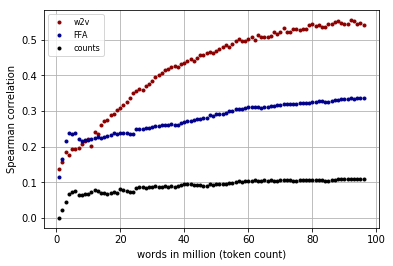

In [48]:
# [spb, spa, spd, w2v]

datarows = {
    "w2v":[v[3] for v in run_to_res.values()],
    "FFA":[v[1] for v in run_to_res.values()],
    "counts":[v[0] for v in run_to_res.values()],
    "runs": [k for k in run_to_res]
}

df = DataFrame(datarows)
#df = DataFrame(datarows, index=runs)

plot = df.plot.line(x="runs", grid=True,
                    color=["darkred", "darkblue", "black"],
                    style=[".",       ".",        "."])
plot.set_xlabel("words in million (token count)")
plot.set_ylabel("Spearman correlation")
plot.legend(loc=2, prop={'size': 8})

In [49]:
fig = plot.get_figure()
fig.savefig(graphics_filename)